# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [76]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [77]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...
1,✅ Trip Verified | Not only my first flight in...
2,✅ Trip Verified | My husband and myself were ...
3,✅ Trip Verified | Organised boarding process. ...
4,✅ Trip Verified | Outward journey BA245 Londo...


In [130]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.9 MB/s eta 0:00:0000:0100:05525.9/587.7 MB 1.8 MB/s eta 0:00:35
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [7]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:0000:0100:01


In [79]:
import spacy #load spacy
nlp = spacy.load("en_core_web_lg", disable=['parser', 'tagger', 'ner'])
def normalize(review, lowercase, remove_stopwords):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = list()
    for token in doc:
        if not remove_stopwords or (remove_stopwords and not token.is_stop):
            lemmatized.append(token.lemma_)
    return " ".join(lemmatized)
df['processed'] = df['reviews'].apply(normalize, lowercase=True, remove_stopwords=True)

/Users/jerbear/opt/anaconda3/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [80]:
df['processed']

0      ✅ trip verified | ba 242 6/2/23 . boarding del...
1      ✅ trip verified |   flight 17 years , time eng...
2      ✅ trip verified |   husband flying madrid 3rd ...
3      ✅ trip verified | organised boarding process ....
4      ✅ trip verified |   outward journey ba245 lond...
                             ...                        
995    ✅ trip verified | madrid london . credit . fle...
996    ✅ trip verified | venice gatwick . use snokart...
997    ✅ trip verified | 3 legs trouble free . lounge...
998    ✅ trip verified | flew london budapest british...
999    ✅ trip verified |   paid vueling airlines flig...
Name: processed, Length: 1000, dtype: object

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [203]:
v_predicted = []
for text in df['processed']:
    sent = sentiment.polarity_scores(text)
    if sent['compound']>0.8: 
        v_predicted.append("Highly Satisfied")
    elif sent['compound']>0.6 and sent['compound']<0.8 : 
        v_predicted.append("Satisfied")
    elif sent['compound']>0.4 and sent['compound']<0.6 : 
        v_predicted.append("Neutral attitude")
    elif sent['compound']>0.2 and sent['compound']<0.4 : 
        v_predicted.append("Dissatisfied")
    else:
        v_predicted.append("Highly Dissatisfied")

In [159]:
len(v_predicted)

1000

In [204]:
df['label'] = pd.DataFrame(v_predicted)
df

,reviews,processed,label
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,✅ trip verified | ba 242 6/2/23 . boarding del...,Highly Satisfied
1,✅ Trip Verified | Not only my first flight in...,"✅ trip verified | flight 17 years , time eng...",Highly Satisfied
2,✅ Trip Verified | My husband and myself were ...,✅ trip verified | husband flying madrid 3rd ...,Highly Satisfied
3,✅ Trip Verified | Organised boarding process. ...,✅ trip verified | organised boarding process ....,Highly Satisfied
4,✅ Trip Verified | Outward journey BA245 Londo...,✅ trip verified | outward journey ba245 lond...,Dissatisfied
...,...,...,...
995,✅ Trip Verified | Madrid to London. Credit whe...,✅ trip verified | madrid london . credit . fle...,Highly Satisfied
996,✅ Trip Verified | Venice to Gatwick. I use Sno...,✅ trip verified | venice gatwick . use snokart...,Highly Dissatisfied
997,✅ Trip Verified | First 3 legs were trouble fr...,✅ trip verified | 3 legs trouble free . lounge...,Highly Satisfied
998,✅ Trip Verified | Flew London to Budapest with...,✅ trip verified | flew london budapest british...,Satisfied


<AxesSubplot: xlabel='label', ylabel='count'>

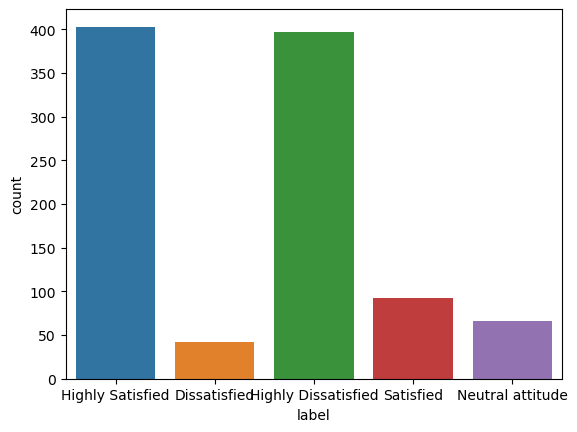

In [205]:
import seaborn as sns
import numpy as np
sns.countplot( x= df['label'] )

In [162]:
Xtrain = df.iloc[:,1]
ytrain = df['label']

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 0.2, random_state=5)

In [237]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features =2000)
X_train_vect = cv.fit_transform(X_train)
X_train_vect.shape

(800, 2000)

In [238]:
df1 = pd.DataFrame(X_train_vect.toarray(), columns=cv.get_feature_names())
df1.head()

/Users/jerbear/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,1,10,100,1000,11,12,12th,13,...,yesterday,yin,ying,yoghurt,york,young,zero,zone,zrh,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [239]:
cv.vocabulary_

{'trip': 1863,
 'verified': 1917,
 'tried': 1862,
 'check': 379,
 'online': 1250,
 'offered': 1237,
 'upgrade': 1900,
 'premium': 1383,
 'economy': 624,
 'decided': 530,
 'website': 1945,
 'allow': 128,
 'choose': 392,
 'seats': 1596,
 'phoned': 1332,
 'ba': 227,
 'happy': 867,
 'picked': 1335,
 'quickly': 1430,
 'told': 1831,
 'changed': 366,
 'booking': 289,
 'airport': 120,
 'turned': 1874,
 'hours': 908,
 'flight': 765,
 'adjacent': 93,
 'aisle': 124,
 'middle': 1150,
 'row': 1555,
 'agent': 104,
 'helpful': 883,
 'fix': 758,
 'suggested': 1749,
 'try': 1869,
 'desk': 554,
 'reach': 1438,
 'line': 1051,
 'boarding': 285,
 'gate': 814,
 'finally': 749,
 'managed': 1110,
 'seat': 1593,
 'window': 1962,
 'sitting': 1654,
 'going': 836,
 'surprisingly': 1767,
 'good': 839,
 'decent': 529,
 'food': 778,
 'service': 1617,
 'flew': 763,
 'bad': 230,
 'attendants': 202,
 'friendly': 802,
 'looked': 1067,
 'better': 268,
 'obviously': 1230,
 'learned': 1026,
 'late': 1020,
 'washington': 19

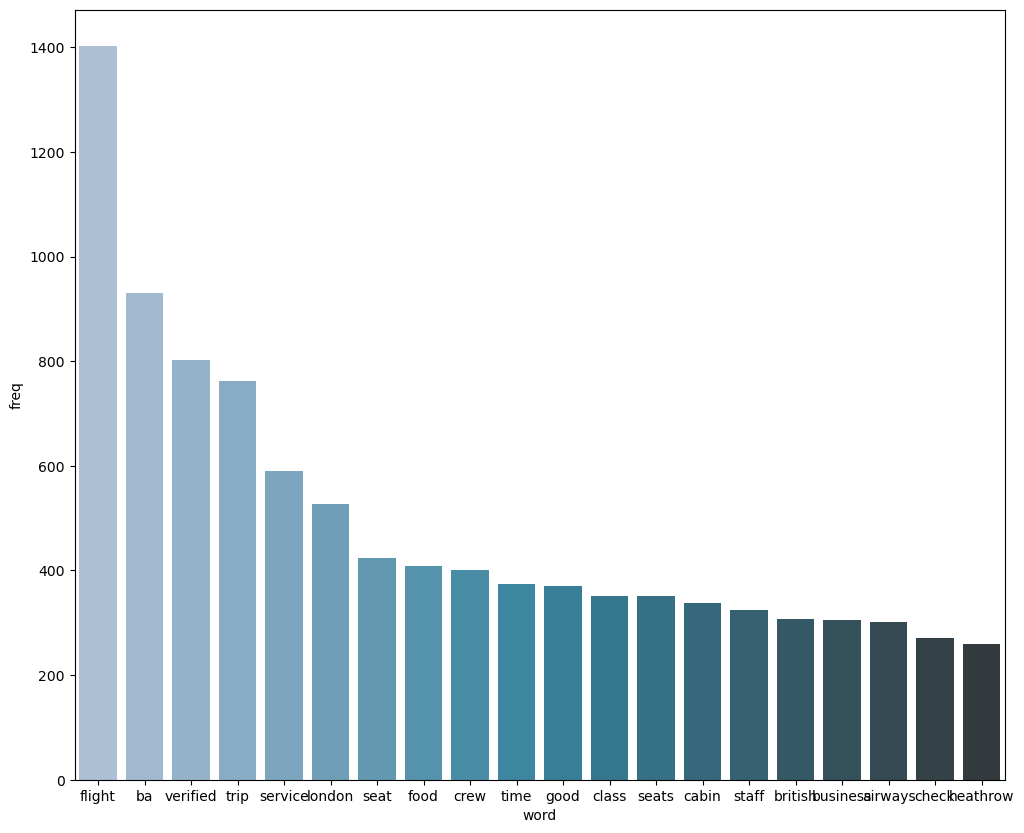

In [243]:
import collections
word_freq = dict(zip(cv.get_feature_names(), np.asarray(X_train_vect.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();


In [226]:
X_test_vect= cv.transform(X_test)
X_test_vect.shape

(200, 500)

In [227]:
#Using Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train_vect, y_train)

MultinomialNB()

In [228]:
from sklearn import metrics
predicted = MNB.predict(X_test_vect)
performance = metrics.classification_report(y_test,predicted, target_names= ["Highly Satisfied"
, "Satisfied", "Neutral attitude", "Dissatisfied", "Highly Dissatisfied"])
print(performance)

                     precision    recall  f1-score   support

   Highly Satisfied       0.00      0.00      0.00         7
          Satisfied       0.67      0.67      0.67        79
   Neutral attitude       0.69      0.80      0.74        83
       Dissatisfied       0.00      0.00      0.00        14
Highly Dissatisfied       0.06      0.06      0.06        17

           accuracy                           0.60       200
          macro avg       0.28      0.30      0.29       200
       weighted avg       0.56      0.60      0.58       200



In [229]:
#Using SVM
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_vect, y_train)

SVC()

In [230]:
from sklearn import metrics
predicted = clf.predict(X_test_vect)
performance = metrics.classification_report(y_test,predicted, target_names= ["Highly Satisfied"
, "Satisfied", "Neutral attitude", "Dissatisfied", "Highly Dissatisfied"])
print(performance)

                     precision    recall  f1-score   support

   Highly Satisfied       0.00      0.00      0.00         7
          Satisfied       0.64      0.90      0.75        79
   Neutral attitude       0.76      0.82      0.79        83
       Dissatisfied       0.00      0.00      0.00        14
Highly Dissatisfied       0.00      0.00      0.00        17

           accuracy                           0.69       200
          macro avg       0.28      0.34      0.31       200
       weighted avg       0.57      0.69      0.62       200



/Users/jerbear/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jerbear/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jerbear/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [231]:
from sklearn.metrics import classification_report
score_train=clf.score(X_train_vect, y_train)
print(score_train)
score_test=clf.score(X_test_vect, y_test)
print(score_test)

0.7975
0.695


In [232]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features =4000)
X_train_vect = cv.fit_transform(X_train)
X_train_vect.shape

(800, 4000)

In [233]:
df1 = pd.DataFrame(X_train_vect.toarray(), columns=cv.get_feature_names())
df1.head()

/Users/jerbear/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,00,000,0053,01,0200,03,0445,05,0510,...,young,younger,youtube,yr,zero,zip,zone,zones,zrh,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [234]:
X_test_vect= cv.transform(X_test)
X_test_vect.shape

(200, 4000)

In [235]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train_vect, y_train)

MultinomialNB()

In [236]:
from sklearn import metrics
predicted = MNB.predict(X_test_vect)
performance = metrics.classification_report(y_test,predicted, target_names= ["Highly Satisfied"
, "Satisfied", "Neutral attitude", "Dissatisfied", "Highly Dissatisfied"])
print(performance)

                     precision    recall  f1-score   support

   Highly Satisfied       0.00      0.00      0.00         7
          Satisfied       0.68      0.76      0.72        79
   Neutral attitude       0.65      0.86      0.74        83
       Dissatisfied       0.00      0.00      0.00        14
Highly Dissatisfied       0.00      0.00      0.00        17

           accuracy                           0.66       200
          macro avg       0.27      0.32      0.29       200
       weighted avg       0.54      0.66      0.59       200



/Users/jerbear/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jerbear/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jerbear/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
